# Майнор Интеллектуальный анализ данных / Введение в анализ данных

## Домашнее задание 3. Логистическая регрессия и случайный лес.

В этом задании вам предстоит:
- поработать с логистической регрессией (полная реализация не потребуется, однако можно заработать бонусные баллы)
- воспроизвести подход случайного леса через одно решающее дерево, поэкспериментировать со случайным лесом.

На все вопросы требуется отвечать развёрнуто, аппелируя к полученным значениям или графикам, ответы вписывать в отдельную ячейку, выбрав для неё тип "Markdown". От полноты и качества ответов будет во многом зависеть ваша итоговая оценка.

Задание выполняется самостоятельно, плагиат будет стандартно наказываться лишением всех баллов за задание.
- Максимальная оценка за задание: 10 баллов.
- Дата выдачи: 28.04.2018
- Срок сдачи: 23:59 18.05.2018

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Часть 0. Подготовка данных.

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [2]:
train = pd.read_csv('mobile_train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# 0 if price_range <= 1, else 1

price_range = [0 if x <= 1 else 1 for x in train.iloc[:, -1]]
train.drop('price_range', axis = 1, inplace = True)

Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
import random
random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(train, price_range, train_size = 0.7)

## Часть 1. Логистическая регрессия.

[4 балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [388]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

from sklearn import preprocessing
X_train, X_test = preprocessing.scale(X_train), preprocessing.scale(X_test)

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [228]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

logisticRegr.fit(X_train, y_train) # fitting the model
y_pred = logisticRegr.predict(X_test) # predict

y_pred_1 = logisticRegr.predict_proba(X_test) # predict proba

In [111]:
# ROC-AUC
from sklearn.metrics import roc_auc_score, accuracy_score
roc_auc_score(y_test, y_pred)

0.97542788509658696

In [112]:
# Accuracy
accuracy_score(y_test, y_pred)

0.97499999999999998

Да, accuracy и ROC-AUC очень высокие -- алгоритм прекрасно предсказывает, т.е. доля правильных ответов большая (accuracy), качество классификатора превосходное (roc-auc). 

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [16]:
import numpy as np

In [92]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_pred_raw = logisticRegr.intercept_ + np.dot(logisticRegr.coef_, X_test.transpose())

In [98]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0,

In [99]:
y_pred_raw

array([[ -7.35024928e+00,  -1.48492151e+01,  -5.57666011e-01,
          6.68516278e+00,   1.92750174e+01,   6.80484918e+00,
         -5.03128741e+00,  -2.93062097e+00,   8.90108818e+00,
          2.48590631e+00,  -4.50297513e-01,  -9.21015692e+00,
         -1.15241028e+01,   9.65183053e+00,   7.53177731e+00,
          4.78324873e+00,   1.53071531e+01,  -1.74307040e+01,
          1.42162492e+01,  -1.01970824e+01,  -7.58709313e+00,
         -6.99017950e+00,  -4.10971653e-01,   4.38071670e+00,
         -3.55679014e+00,  -1.10918836e+01,  -9.60474619e+00,
          1.52796641e+01,   4.02150299e+00,   2.39817805e+00,
          2.39426366e+00,   6.63226639e-01,   4.79967905e+00,
          1.88221813e+00,   1.53956770e+00,   1.53587611e+01,
          1.60497357e+01,  -1.57493187e+01,  -8.60170279e+00,
         -5.47945462e+00,   1.02591911e+01,   1.21258610e+00,
         -8.64963542e-01,  -5.07078984e+00,   9.24075353e+00,
          1.86108953e+00,  -2.31881100e+00,  -9.81001993e+00,
        

Учитывая, что вероятность принадлежности к классу может принимать значения от 0 до 1, это точно не вероятностные значения. Но мы можем заметить, что все негативные и положительные числа в 'y_pred_raw' сопоставляются с принадлежностью к классу 0 и классу 1, соответственно. Чтобы получить вероятности, нужно обернуть 'y_pred_raw' в сигмоиду, определенную на промежутке [0, 1].

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [101]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [193]:
from matplotlib import pylab as plt

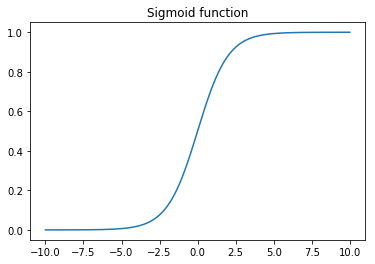

In [120]:
x = np.linspace(-10, 10, 1000)

plt.title('Sigmoid function')
plt.plot(x, sigmoid(x))
plt.show()

Нелинейная гладкая функция. Хорошо дифференциируема -- отлично подходит для реализации градиентного спуска. Область значений функции -- [0, 1] $\in R$, может быть использована для реализации алгоритмов, выдающих вероятностные значения или классифицирующих. 

___К тому же (понадобится на 3 курсе):___ может возникнуть проблема "vanishing gradient" при обучения нейронной сети с сигмоидой в качестве функции активации, если используем градиентные методы обучения типа Backpropagation. Из-за небольшого порога области значений сигмоиды градиент рискует быть настолько маленьким, что станет неинформативен при обновлении весов --> первые слои нейросети неинформативны --> недообучение или прекращение процесса обучения вообще.

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [134]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_sig = sigmoid(y_pred_raw)
y_sig

array([[  6.42019742e-04,   3.55686727e-07,   3.64087672e-01,
          9.98752247e-01,   9.99999996e-01,   9.98892840e-01,
          6.48802843e-03,   5.06604516e-02,   9.99863778e-01,
          9.23147875e-01,   3.89290032e-01,   1.00008344e-04,
          9.88875140e-06,   9.99935696e-01,   9.99464502e-01,
          9.91700688e-01,   9.99999775e-01,   2.69117193e-08,
          9.99999330e-01,   3.72775339e-05,   5.06695687e-04,
          9.20033973e-04,   3.98679160e-01,   9.87638338e-01,
          2.77388594e-02,   1.52352491e-05,   6.74035008e-05,
          9.99999769e-01,   9.82389681e-01,   9.16688265e-01,
          9.16388831e-01,   6.59984835e-01,   9.91834830e-01,
          8.67865698e-01,   8.23401872e-01,   9.99999786e-01,
          9.99999893e-01,   1.44596488e-07,   1.83758793e-04,
          4.15427421e-03,   9.99964967e-01,   7.70756210e-01,
          2.96303364e-01,   6.23829934e-03,   9.99903005e-01,
          8.65423891e-01,   8.95769785e-02,   5.48957391e-05,
        

In [107]:
y_pred_1

array([[  9.99357980e-01,   6.42019742e-04],
       [  9.99999644e-01,   3.55686727e-07],
       [  6.35912328e-01,   3.64087672e-01],
       ..., 
       [  7.39511007e-02,   9.26048899e-01],
       [  9.99999818e-01,   1.81627294e-07],
       [  9.92009044e-01,   7.99095649e-03]])

`y_pred_1` выдает вероятности принадлежности к классам 0 и 1 для каждого объекта, тогда как `sigmoid(y_pred_raw)` выдает только вероятности принадлежности к классу 1. Посмотрим только на второй столбец значений `y_pred_1` -- они идентичны выдаче `sigmoid(y_pred_raw)`.

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import roc_curve, precision_recall_curve

In [138]:
# fpr, tpr, thresholds
x, y, t = roc_curve(y_test, y_sig.reshape([600, -1]))

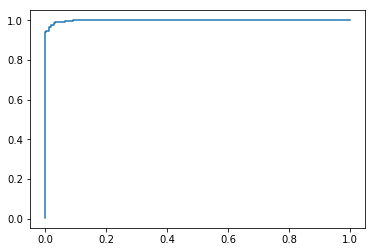

In [139]:
plt.plot(x, y)
plt.show()

Мечта датасаентолога, почти roc-haven (0,1)!

In [142]:
# precision, recall, thresholds
y, x, t = precision_recall_curve(y_test, y_sig.reshape([600, -1]))

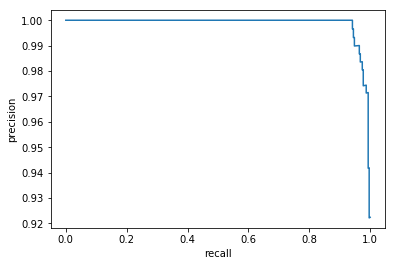

In [144]:
plt.plot(x, y)
plt.ylabel("precision")
plt.xlabel("recall")
plt.show()

Практически идеальное соотношение точности и полноты предсказаний (1, 1). Почти всегда можем доверять классификатору при предсказании положительного класса (точность), доля найденных положительных ответов крайне высока (полнота).

__Итог:__ Наш классификатор всех прекраснее на свете!

### Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В `loss_history` необходимо сохранять вычисленное на каждой итерации значение функции потерь. 

In [248]:
from sklearn.base import BaseEstimator
from sklearn import preprocessing

class LogReg(BaseEstimator):
    def __init__(self, lambda_2 = 1.0, tolerance = 1e-4, max_iter = 1000, alpha = 1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        y = np.array(y)
        y[y == 0] = -1 # replace y to discrete values [-1; 1]
        X = np.concatenate([np.ones(X.shape[0]).reshape([-1, 1]), X], axis = 1) # add ones as intercepts
        X = preprocessing.scale(X) # standartization
        
        # initialize some very normal weights
        self.w = np.random.normal(size = (X.shape[1], 1), scale = .01)
        # or define zero weights 
        # self.w = np.zeros(X.shape[1])
        
        # loop
        meme = 0
        while meme <= self.max_iter:
            meme += 1
            old_weights = self.w
            self.loss_history.append(self.calc_loss(X, y)) # append loss for old weights to history
            self.w = (self.w.T - self.alpha * self.calc_gradient(X, y)).T # update weights
            print(meme)
            print(self.loss_history[-1])
            if (self.loss_history[-1] - self.calc_loss(X, y) < self.tolerance): # old - new
                self.w = old_weights
                break
                

        #print(meme)
        #print(self.w)
        #print(old_weights)
        #print(X)
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')

        best_scores = X.dot(self.w) # scores shape (l, 1)
        prob_plus = np.array(1 / (1 + np.exp(-best_scores))) # sigmoid to get propabilities [0,1]
        
        return np.concatenate([1 - prob_plus, prob_plus], axis = 1)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        # MINUS BEFORE GRADIENT
        # add minus before exp?
        gradient = -y.dot(X) / (1 + np.exp(y.dot((self.w * X.T).T))) + self.lambda_2 * self.w.T
        return gradient

        
    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        # w*X shape (l, 1)
        # shape of weights (d, 1)
        reg = self.lambda_2/2 * np.sum(abs(self.w)**2)
        
        loss = 1/len(y) * np.sum(np.log(1 + np.exp(-y*(X.dot(self.w))))) + reg
        return loss

In [249]:
my_lr = LogReg()

In [250]:
my_lr.fit(X_train, y_train)

1
970.848791429


LogReg(alpha=0.001, lambda_2=1.0, max_iter=1000, tolerance=0.0001)

__Итог:__

У меня не вышло, но я пыталась :(

Там какая-то проблема с подсчетом градиента, как мне кажется. Разбивала код и прогоняла в отдельных ячейках, так и не смогла найти проблему. В каких-то случаях лосс становился крошечным, но я уже не помню, где так было, надо снова членить код.

Еще кажется, после поисков в интернетах, что экспоненту внутри градиента нужно возводить в отрицательную степень. Но это не помогает...

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

## Часть 2. Случайные леса.

[6 баллов]

Случайный лес — алгоритм машинного обучения, представляющий собой бэггинг над решающими деревьями (усреднение ответов множества слабых алгоритмов) с 2 основными идеями:
- Использование подмножества признаков при построении каждого сплита дерева.
- Бутстрап обучающей выборки для построения каждого дерева (с повторениями).

В этом задании мы попробуем оценить пользу каждой из идей. Будем использовать ту же выборку с тем же разбиением на 2 части. Для начала обучите решающее дерево `DecisionTreeClassifier` из scikit-learn и посчитайте ROC-AUC и Accuracy (порог 0.5). Не забудьте зафикиксировать сид для построения дерева (несмотря на то, что в классической реализации никакой случайности нет, при большой глубине дерева может возникать неоднозначность в выборке признака в сплите). Используйте этот сид для всех заданий ниже.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(estimator=tree, param_grid = {'criterion': ['gini', 'entropy']})
tree_grid.fit(X_train, y_train)

tree_grid.best_params_

{'criterion': 'entropy'}

In [21]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

In [22]:
y_pred_tree

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1,

In [23]:
# roc-auc
roc_auc_score(y_test, y_pred_tree)

0.94845337849884115

In [24]:
# accuracy
accuracy_score(y_test, y_pred_tree)

0.94833333333333336

Метрики для дерева чуть хуже, чем для логита.

### 2.1 Бэггинг классификаторов

Реализуйте бэггинг над решающими деревьями (усреднение предсказанных вероятностей всего ансамбля). 
В качестве основы используйте всё тот же `DecisionTreeClassifier`. Количество базовых алгоритмов предлагается брать равным 100. 

Посчитайте качество с помощью тех же метрик. Ответьте на следующие вопросы:
- Что интересного вы видите?
- С чем это связано?

In [50]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.ensemble import BaggingClassifier

In [51]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)

In [52]:
bag = BaggingClassifier(base_estimator = tree, bootstrap = False, n_estimators = 100, random_state = 123)

bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

In [53]:
# roc-auc
roc_auc_score(y_test, y_pred_bag)

0.94827509359957207

In [54]:
# accuracy
accuracy_score(y_test, y_pred_bag)

0.94833333333333336

Метрики особо не изменились, на очень малое число уменьшился roc-auc. Скорее всего это связано с тем, что здесь мы осуществляем беггинг над параметрами, не рандомизируя сами деревья. В таком случае агрегиррованные предикторы, полученые с помощью беггинга, могут действительно понижать разброс предсказаний от разных алгоритмов (=деревьев с разными параметрами), повышая точность предсказаний (accuracy не изменилась по сранению с обычным решающим деревом, обученным выше). 

Но поскольку сам процесс выбора итогового алгоритма не случайный и зависит только от показателей качества деревьев на training data, есть шанс переобучения -- после нерандомизированного беггинга roc-auc немного понизился. 

### 2.2 Сэмплирование обучающей выборки

Добавим к нашему бэггингу бутстрап выборки (генерация случайной выборки того же размера с возвращением). Для этого может пригодиться `numpy.random.randint`.

Посчитайте качество. Что вы видите?

In [204]:
np.random.seed(123)  # для одинакового бутстрапа в каждом запуске

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
rand_bag = BaggingClassifier(base_estimator = tree, bootstrap = True, n_estimators = 100, random_state = 123)

rand_bag.fit(X_train, y_train)
y_pred_rand_bag = rand_bag.predict(X_test)

In [205]:
# roc-auc
roc_auc_score(y_test, y_pred_rand_bag)

0.96305045462649319

In [206]:
# accuracy
accuracy_score(y_test, y_pred_rand_bag)

0.96333333333333337

Обе метрики сильно улучшились и по сравнению с обычным решающим деревом, и по сравнению с нерандомизированным беггингом. Бутстрап обладает замечательным свойством -- борьбой с переобучением, что и помогло получить более робастные, качественные оценки при проверке качества алгоритма на тестовой выборке. 

Семплируя выборки, на которых происходит обучение деревьев, мы с большей вероятностью получаем выборки с разными распределениями. В таком случае у алгоритма нет возможности "подстроиться" под данные, и он будет устойчив на тренировочном сете. 

### 2.3 Выбор случайного подмножества признаков

Временно забудем о бутстрапе выборки и добавим выбор случайного подмножества признаков при построении каждого сплита. В `DecisionTreeClassifier` за это отвечает параметр `max_features`. По умолчанию он имеет значение `None`, что обозначает использование всех возможных признаков. Для задачи классификации рекоменуется использовать квадратный корень от количества признаков. Попробуйте выставить такое значение. На этот раз надо отключить фиксированный сид в построении дерева, так как иначе каждый раз мы будем выбирать одинаковые подмножества признаков. 

Посчитайте качество. Что вы видите?

In [131]:
np.random.seed(123)  # для воспроизводимости построения случайных подмножеств признаков

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tree = DecisionTreeClassifier(criterion = 'entropy', max_features = int(round(sqrt(X_train.shape[1]))))
tree.fit(X_train, y_train)

y_pred_tree2 = tree.predict(X_test)

In [132]:
roc_auc_score(y_test, y_pred_tree2)

0.88846050989481196

In [133]:
accuracy_score(y_test, y_pred_tree2)

0.88833333333333331

Качество сильно ухудшилось по сравнению с обычным решающим деревом, нерандомизированным и рандомизированным беггингом. 

### 2.4 = 2.2 + 2.3

Объединим два подхода (бутстрап + выбор подмножества признаков). Получим случайный лес.

Посчитайте качество. Что вы видите?

In [114]:
np.random.seed(123)  # для одинакового бутстрапа и выбора подмножеств признаков в каждом запуске

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tree = DecisionTreeClassifier(criterion='entropy', max_features = int(round(sqrt(X_train.shape[1]))))
tree24 = BaggingClassifier(base_estimator = tree, bootstrap = True, n_estimators = 100, random_state = 123)

In [115]:
tree24.fit(X_train, y_train)
y_pred24 = tree24.predict(X_test)

In [116]:
roc_auc_score(y_test, y_pred24)

0.96305045462649319

In [117]:
accuracy_score(y_test, y_pred24)

0.96333333333333337

Метрики вернулись к состоянию, в котором пребывали на пункте беггинга с бутстрапом. Вывод -- случайное подмножество признаков является недостаточным "уровнем" рандомизации. Беггинг и бутстрап наше все. 

То, что мы сделали уже реализовано в `RandomForestClassifier`. Попробуйте воспользоваться им. Количество используемых деревьев передаётся в параметре `n_estimators`.

Посчитайте качество. Что вы видите?

In [92]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.ensemble import RandomForestClassifier

In [122]:
np.random.seed(123)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [123]:
roc_auc_score(y_test, y_pred_rf)

0.97149670172936342

In [124]:
accuracy_score(y_test, y_pred_rf)

0.97166666666666668

Метрики значительно улучшились и чуть выше тех, которые мы получили на шаге 2.4. Видимо, это связано с тем, что `RandomForestClassifier` по дефолту использует более оптимальные гиперпараметры для обучения.

### 2.5 Влияние количества используемых деревьев в случайном лесе

Один из параметров случайного леса — количество деревьев, используемых в бэггинге. Оценим, как влияет этот параметр на финальное качество. Для этого обучите случайные леса с разным количество деревьев (например, перебирайте от 10 до 1000 с шагом в 10), оцените качество с помощью ROC-AUC. Постройте график зависимости ROC-AUC от количества используемых деревьев. Что вы видите?

In [188]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
rf = RandomForestClassifier(criterion='entropy')
# gridsearch CV for hyperpar
rf_grid = GridSearchCV(estimator=rf, scoring='roc_auc', param_grid = {'n_estimators': np.arange(10, 1010, 10)})

In [189]:
rf_grid.fit(X_train, y_train)

rf_grid.best_params_

{'n_estimators': 980}

In [190]:
import warnings
warnings.filterwarnings("ignore")

In [191]:
# Extracting quality metrics from GridSearch
# creating a dictionary with roc-auc values as values
# and RandomForestClassifier's hyperparameters as keys

results = {}
for i in range(0, len(rf_grid.grid_scores_)):
    results[rf_grid.grid_scores_[i][0]['n_estimators']] = rf_grid.grid_scores_[i][1]

In [198]:
# n_estimators
x = list(results.keys())

In [199]:
# ROC-AUC values
y = list(results.values())

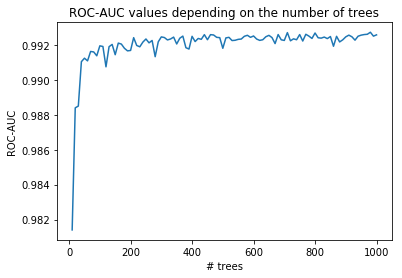

In [200]:
plt.title('ROC-AUC values depending on the number of trees')
plt.plot(x, y)
xlabel('# trees')
ylabel('ROC-AUC')
plt.show()

ROC-AUC приближается к heaven после количества деревьев, используемых в беггинге, $\approx 80$. Как показал `GridSearch`, 980 деревьев для беггинга дают наилуший результат. Большее количество деревьев в "лесу" дает возможность хорошей рандомизации и предотвращает переобучение. 

In [201]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=980)

rf.fit(X_train, y_train)
y_pred_best = rf.predict(X_test)

In [202]:
roc_auc_score(y_test, y_pred_rf)

0.97149670172936342

In [203]:
accuracy_score(y_test, y_pred_rf)

0.97166666666666668

Достигли рая. В целом наши метрики не отличаются от тех, которые мы получили с `RandomForestClassifier` без указания гиперпараметра с количеством деревьев для беггинга. Видимо, это связано с тем, что в целом Random Forest, благодаря разным способам рандомизации и усреднению ответов, благодаря работе с разнообразными деревьями, находит оптимальные гиперпараметры ансамбля. 

Random Forest ищет лучшие параметры среди всех рандомно выбранных выборок параметров деревьев, и у него получается хорошо предсказывать!

### 2.6 Важность признаков

Случайный лес позволяет оценить важность признаков. У обученного случайного леса есть аттрибут `feature_importances_`, где храниться важность для каждого признака. Постройте `barplot` с важностью признаков (удобно использовать библиотеку `seaborn`, где можно для каждого столбца передать название признака `train.columns`).

In [236]:
import seaborn as sns

In [212]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
importances = rf.feature_importances_
features = X_train.columns.values

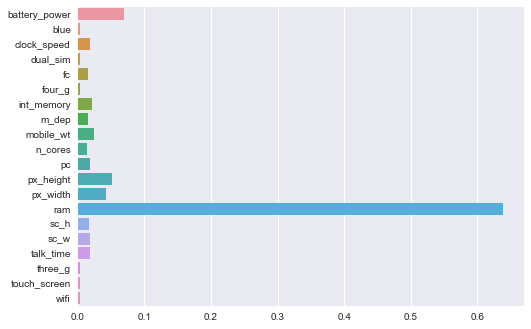

In [247]:
sns.barplot(y = features, x = importances)

Well, самый важный признак -- Random Access Memory in Megabytes. Второй по важности -- battery power.

## Выводы

Напишите, что интересного вы узнали в этой работе, в каких экспериментах какие результаты получились.

1) __По логиту__:
- Логит используется в случае, если отклик имеет бинарную или категориальную природу.
- Может быть использован как для регрессии, так и для классификации. 
- Логистическая функция (=сигмоида) имеет S-образную shape, определенную на отрезке [0, 1], что позволяет не только разделять данные на классы, но и описывать присвоение к классу в вероятностных значениях. Коэффициенты подбираются так же, как и в линейных регрессиях, -- с помощью MLE. Оболочка сигмоиды обязательна, если мы хотим получить в итоге предсказания (принадлежности к классу в задаче на классификацию). 
- Для логита можем вполне использовать регуляризацию, чтобы бороться с переобучнием и повышать качество алгоритма. 
- Поскольку сигмоида -- гладкая функция, с ней хорошо работают алгоритмы обучения, основанные на градиентном спуске. Но (при обучении нейроннных сеток с back propogation) может возникнуть проблема исчезающего градиента, когда значения градиенты настолько малы, что веса не обновляются, процесс обучения не происходит. 
- Минус: сложно писать класс, реализующий логит с полным градиентном спуском и не запутаться :)

2) __По Random Forest__:
- Важные преимущества случайного леса: 1) работа с категориальными переменными, 2) обучение как классификатора, так и регрессии. 
- Random Forest случайно генерит количество наблюдений и параметры, на которых обучаются решающие деревья. Затем усредняет их ответы. Это помогает эффективно бороться с переобучением и получать отлиные показатели качества. Random Forest большой молодец!
- Проблема случайного леса: если `n_estimators` слишком большое, лес долго обучается (технически затратен).
- Гораздо мощнее по сравнению с обычным решающим деревом. Даже без поиска оптимального гиперпараметра с GridSearch, с дефолтными гиперпараметрами случайного леса можно получить очень точные предсказания и высокие показатели качество алгоритма случайного леса. 

И с помощью логита, и с помощью случайного леса мы итого достигли примерно одинакового качества алгоритмов: 0.97 и для accuracy, и для roc-auc.